# Phases analysis

In [1]:
import numpy as np
from matplotlib import pyplot as plt #this is the traditional method
from statistics import stdev
from scipy.optimize import curve_fit # import method used here

Importing data from files:
- Frequencies and tension amplitudes
- Tension-time measurements (square wave) to estimate noise through generator amplitude

In [2]:
file_folder = '../data/III session/Frequency response/'
file_name = 'phases.csv'
data_file = file_folder + file_name
frequencies,phaseGen,phaseR,phaseL,phaseC  = np.loadtxt(data_file, delimiter = ',', skiprows = 1, usecols = (0,1,2,3,4), unpack = True)

folder = '../data/III session/Constant frequency/'
file_name = 'phaseFCost19.5kHz.csv'
# file_name = 'squareWave100Hz.csv'
data_file = folder + file_name
phaseGenFCost = np.loadtxt(data_file, delimiter=',', skiprows=1, usecols=(1), unpack=True)

The data scatter plots are the following:

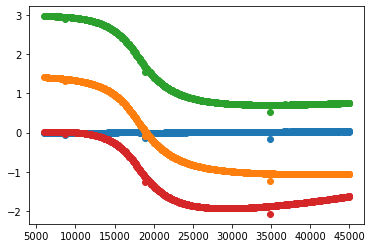

In [3]:
plt.scatter(frequencies,phaseGen)
plt.scatter(frequencies,phaseR)
plt.scatter(frequencies,phaseL)
plt.scatter(frequencies,phaseC)

We now compute $\sigma$ from data (half period since the use of a square wave) and we use it as our noise estimation.

In [4]:
sigma = stdev(phaseGenFCost)

phasesSigma = []
for x in range(len(frequencies)):
    phasesSigma.append(sigma)
sigma

0.001980758583914258

---
## Fitting data
We are now going to use curve_fit() method from scipy.
We now define the function we are going to fit the data with(values are expessed in radians):
$$ \phi_R = \arctan{\frac{1 - \omega^2 L C}{R \omega C}}$$
$$ \phi_R = \arctan{\frac{1 - \omega^2 L C}{R \omega C}} + \frac{\pi}{2}$$
$$ \phi_R = \arctan{\frac{1 - \omega^2 L C}{R \omega C}} - \frac{\pi}{2}$$

In [5]:
def Gen_phase_model(f,phi_gen):
    return phi_gen

def R_phase_model(f, R, L, C):
    num = 1 - (2 * np.pi * f)**2 * L * C
    den = R * (2 * np.pi * f) * C
    return np.arctan(num / den)

def L_phase_model(f, R, L, C):
    num = 1 - (2 * np.pi * f)**2 * L * C
    den = R * (2 * np.pi * f) * C
    return np.arctan(num / den) + np.pi/2

def C_phase_model(f, R, L, C):
    num = 1 - (2 * np.pi * f)**2 * L * C
    den = R * (2 * np.pi * f) * C
    return np.arctan(num / den) - np.pi/2

We now have to make our initial guess of the fitting parameters. We can make exact initial guesses or set bounds for params values

In [6]:
R = 1.17252e+03
L = 4.741e-02
C = 1.46e-09
phi_gen = 2*np.pi

initial_guess_gen = np.array([phi_gen])
initial_guess_R = np.array([ R, L, C])
initial_guess_L = np.array([R, L, C])
initial_guess_C = np.array([R, L, C])

boundsGen = [[0.0],[7.0]]
boundsR = [[990,3.5e-02,1.3e-09],[2500,5e-02,1.6e-09]]
boundsL = [[990,3.5e-02,1.3e-09],[2500,5e-02,1.6e-09]]
boundsC = [[990,3.5e-02,1.3e-09],[2500,5e-02,1.6e-09]]

In [7]:
# the method returns two arrays: one with the resulting fit parameters and then the covariance matrix
fit_gen,covariance_gen = curve_fit(Gen_phase_model, frequencies, phaseGen,bounds=boundsGen,sigma=phasesSigma,absolute_sigma=True)
fit_R, covariance_R = curve_fit(R_phase_model, frequencies, phaseR,bounds=boundsR,sigma=phasesSigma,absolute_sigma=True)
fit_L, covariance_L = curve_fit(L_phase_model, frequencies, phaseL,bounds=boundsL,sigma=phasesSigma,absolute_sigma=True)
fit_C, covariance_C = curve_fit(C_phase_model, frequencies, phaseC,bounds=boundsC,sigma=phasesSigma,absolute_sigma=True)

#the elements on the the diagonal represent the errors on the fit parameters
error_gen = np.sqrt(np.diag(covariance_gen))
error_R = np.sqrt(np.diag(covariance_R))
error_L = np.sqrt(np.diag(covariance_L))
error_C = np.sqrt(np.diag(covariance_C))


### Fit results
Printing out fit results

In [8]:
print()
print('Phi_0   = ','{:.3f}'.format(phi_gen), '±', '{:.10f}'.format(error_gen[0]), ' V')

print()
print('R    = ','{:.3f}'.format(fit_R[0]), '±', '{:.10f}'.format(error_R[0]), ' $\Omega$')
print('L    = ','{:.5f}'.format(fit_R[1]), '±', '{:.10f}'.format(error_R[1]), ' Henry')
print('C    = ','{:.12f}'.format(fit_R[2]), '±', '{:.12f}'.format(error_R[2]), ' F')

print()
print('R    = ','{:.3f}'.format(fit_L[0]), '±', '{:.10f}'.format(error_L[0]), ' $\Omega$')
print('L    = ','{:.5f}'.format(fit_L[1]), '±', '{:.10f}'.format(error_L[1]), ' Henry')
print('C    = ','{:.12f}'.format(fit_L[2]), '±', '{:.12f}'.format(error_L[2]), ' F')

print()
print('R    = ','{:.3f}'.format(fit_C[0]), '±', '{:.10f}'.format(error_C[0]), ' $\Omega$')
print('L    = ','{:.5f}'.format(fit_C[1]), '±', '{:.10f}'.format(error_C[1]), ' Henry')
print('C    = ','{:.12f}'.format(fit_C[2]), '±', '{:.12f}'.format(error_C[2]), ' F')



Phi_0   =  6.283 ± 0.0000553855  V

R    =  2500.000 ± 0.0000000002  $\Omega$
L    =  0.04110 ± 0.0000087785  Henry
C    =  0.000000001600 ± 0.000000000000  F

R    =  2500.000 ± 0.0000000001  $\Omega$
L    =  0.03687 ± 0.0000075443  Henry
C    =  0.000000001600 ± 0.000000000000  F

R    =  2500.000 ± 0.0000000000  $\Omega$
L    =  0.03500 ± 0.0000038671  Henry
C    =  0.000000001300 ± 0.000000000000  F


#### Graphical error visualization
We now try to visualize the covariance matrix with a colorplot:

In [9]:
# print('Gen')
# plt.imshow(np.log(np.abs(covariance_gen)))
# plt.colorbar()
# plt.show()
#
# print('R')
# plt.imshow(np.log(np.abs(covariance_R)))
# plt.colorbar()
# plt.show()
# print('L')
#
# plt.imshow(np.log(np.abs(covariance_L)))
# plt.colorbar()
# plt.show()
# print('C')
#
# plt.imshow(np.log(np.abs(covariance_C)))
# plt.colorbar()
# plt.show()

### Fit accuracy
We are now going to evaluate the fit accuracy parameters.

In [10]:
phase_gen_model = Gen_phase_model(frequencies, fit_gen[0])
residual_gen = phaseGen - phase_gen_model
phase_R_model = R_phase_model(frequencies, fit_R[0], fit_R[1], fit_R[2])
residual_R = phaseR - phase_R_model
phase_L_model = L_phase_model(frequencies, fit_L[0], fit_L[1], fit_L[2])
residual_L = phaseL - phase_L_model
phase_C_model = C_phase_model(frequencies, fit_C[0], fit_C[1], fit_C[2])
residual_C = phaseC - phase_C_model

In [11]:
chisq_gen = sum((residual_gen/ sigma)**2)
degrees_of_freedom_gen = len(residual_gen) - len(initial_guess_gen)
reduced_chisq_gen = chisq_gen / degrees_of_freedom_gen

chisq_R = sum((residual_R/ sigma)**2)
degrees_of_freedom_R = len(residual_R) - len(initial_guess_R)
reduced_chisq_R = chisq_R / degrees_of_freedom_R

chisq_L = sum((residual_L/ sigma)**2) #typo corrected
degrees_of_freedom_L = len(residual_L) - len(initial_guess_L)
reduced_chisq_L = chisq_L / degrees_of_freedom_L

chisq_C = sum((residual_C/ sigma)**2) #typo corrected
degrees_of_freedom_C = len(residual_C) - len(initial_guess_C)
reduced_chisq_C = chisq_C / degrees_of_freedom_C

print('GEN')
print('chi-square      = ',chisq_gen)
print('degrees of freedom = ',degrees_of_freedom_gen)
print('reduced chi-square = ',reduced_chisq_gen)

print('R')
print('chi-square        = ',chisq_R)
print('degrees of freedom = ',degrees_of_freedom_R)
print('reduced chi-square = ',reduced_chisq_R)

print('L')
print('chi-square         = ',chisq_L)
print('degrees of freedom = ',degrees_of_freedom_L)
print('reduced chi-square = ',reduced_chisq_L)

print('C')
print('chi-square    = ',chisq_C)
print('degrees of freedom = ',degrees_of_freedom_C)
print('reduced chi-square = ',reduced_chisq_C)


GEN
chi-square      =  68776.50313476114
degrees of freedom =  1278
reduced chi-square =  53.815730152395254
R
chi-square        =  5678284.041991426
degrees of freedom =  1276
reduced chi-square =  4450.065863629644
L
chi-square         =  17203504.40424668
degrees of freedom =  1276
reduced chi-square =  13482.370222763857
C
chi-square    =  106173948.37753567
degrees of freedom =  1276
reduced chi-square =  83208.42349336651


## Plotting data
Now that we're done with fitting let's plot our data using [matplotlib](https://matplotlib.org).

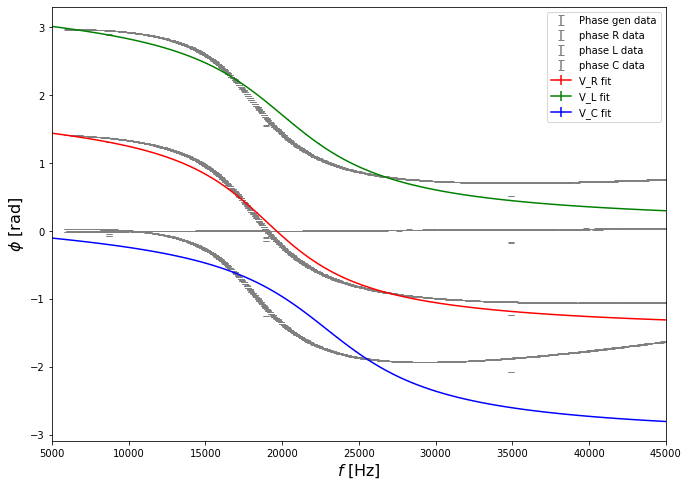

In [12]:
plt.figure(figsize = (11,8))                  #specify figure size as 7 x 5 inches
#for default size, type plt.figure()

#axis labels
plt.xlabel(r"$f$ [Hz]", fontsize = 16)
plt.ylabel(r"$\phi$ [rad]", fontsize = 16)

# Plotting the actual experimental data
plt.errorbar(frequencies, phaseGen,
             xerr=None, yerr=sigma,
             linestyle = 'none',
             color = 'gray',
             capsize = 3, capthick = 1, label = "Phase gen data")
plt.errorbar(frequencies, phaseR,
             xerr=None, yerr=sigma,
             linestyle = 'none',
             color = 'gray',
             capsize = 3, capthick = 1, label = "phase R data")
plt.errorbar(frequencies, phaseL,
             xerr=None, yerr=sigma,
             linestyle = 'none',
             color = 'gray',
             capsize = 3, capthick = 1, label = "phase L data")
plt.errorbar(frequencies, phaseC,
             xerr=None, yerr=sigma,
             linestyle = 'none',
             color = 'gray',
             capsize = 3, capthick = 1, label = "phase C data")

#create curve showing fit to data
freq_fit = np.linspace(5000, 45000, 100)
VR_fit = R_phase_model(freq_fit, fit_R[0], fit_R[1], fit_R[2])
VL_fit = L_phase_model(freq_fit, fit_L[0], fit_L[1], fit_L[2])
VC_fit = C_phase_model(freq_fit, fit_C[0], fit_C[1], fit_C[2])

#plotting the fitting curves
plt.errorbar(freq_fit, VR_fit, xerr = None, yerr = sigma, color = 'red', label = 'V_R fit' )
plt.errorbar(freq_fit, VL_fit, xerr = None, yerr = sigma, color = 'green', label = 'V_L fit' )
plt.errorbar(freq_fit, VC_fit, xerr = None, yerr = sigma, color = 'blue', label = 'V_C fit' )
plt.xlim(5000 , 45000)
# plt.ylim(0.0,7.0)
# plt.xticks([0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360],
#            ('0', '', '', 90,  '',  '', 180,  '',  '', 270,  '',  '', 360))
plt.legend(loc = 'best')

plt.savefig('../figs/Phases.pdf')
